Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/thread_ring/2/'

N = 100_000
R = 100_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:41:08 2025 +0200) (509.26ms elap...,0.337,0.0352,0.458,1.09,0.19,12.61,57.03 C,Nominal
1,(Sat Apr 5 08:41:09 2025 +0200) (508.15ms elap...,0.607,0.0874,0.555,1.33,0.30,17.96,56.73 C,Nominal
2,(Sat Apr 5 08:41:09 2025 +0200) (506.03ms elap...,0.988,0.0226,0.492,1.69,0.28,19.76,56.73 C,Nominal
3,(Sat Apr 5 08:41:10 2025 +0200) (507.41ms elap...,0.255,0.0344,0.416,0.87,0.17,11.37,56.34 C,Nominal
4,(Sat Apr 5 08:41:10 2025 +0200) (508.84ms elap...,0.282,0.0179,0.413,0.88,0.19,12.12,56.34 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(522, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:41:20 2025 +0200) (1007.81ms ela...,38.9,0.0740,1.420,41.72,3.94,98.92,58.12 C,Nominal
1,(Sat Apr 5 08:41:21 2025 +0200) (1004.76ms ela...,36.3,0.0519,0.694,39.20,3.80,98.80,61.68 C,Nominal
2,(Sat Apr 5 08:41:22 2025 +0200) (1004.51ms ela...,36.2,0.0485,0.699,39.13,3.79,97.65,64.27 C,Nominal
3,(Sat Apr 5 08:41:23 2025 +0200) (1004.03ms ela...,35.9,0.0508,0.707,38.92,3.74,95.73,66.58 C,Nominal
4,(Sat Apr 5 08:41:24 2025 +0200) (1004.91ms ela...,37.0,0.0717,0.781,40.09,3.82,97.23,69.03 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:27:16 2025 +0200) (509.26ms elap...,4.7000,0.0000,0.455,5.31,0.92,87.41,52.76 C,Nominal
1,(Sat Apr 5 08:27:17 2025 +0200) (508.04ms elap...,0.0923,0.0316,0.369,0.30,0.05,3.33,52.74 C,Nominal
2,(Sat Apr 5 08:27:17 2025 +0200) (508.96ms elap...,0.0782,0.0000,0.260,0.28,0.03,2.53,52.74 C,Nominal
3,(Sat Apr 5 08:27:18 2025 +0200) (509.33ms elap...,1.0200,0.0000,0.304,1.36,0.26,21.65,52.69 C,Nominal
4,(Sat Apr 5 08:27:18 2025 +0200) (509.13ms elap...,0.0876,0.0000,0.263,0.28,0.05,3.12,52.69 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(576, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:27:28 2025 +0200) (1007.74ms ela...,11.10,0.0000,0.954,12.05,1.32,92.62,52.68 C,Nominal
1,(Sat Apr 5 08:27:29 2025 +0200) (1006.31ms ela...,7.00,0.0000,0.544,7.70,0.74,72.01,52.67 C,Nominal
2,(Sat Apr 5 08:27:30 2025 +0200) (1006.55ms ela...,7.27,0.0000,0.550,8.00,0.73,71.56,52.77 C,Nominal
3,(Sat Apr 5 08:27:31 2025 +0200) (1005.98ms ela...,8.35,0.0131,0.633,9.11,1.07,78.47,52.71 C,Nominal
4,(Sat Apr 5 08:27:32 2025 +0200) (1005.73ms ela...,11.40,0.0000,1.270,12.50,1.22,98.95,54.42 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:41:08,0.337,0.0352,0.458,1.09,0.19,12.61,57.03,Nominal,509.26
1,2025-04-05 08:41:09,0.607,0.0874,0.555,1.33,0.30,17.96,56.73,Nominal,508.15
2,2025-04-05 08:41:09,0.988,0.0226,0.492,1.69,0.28,19.76,56.73,Nominal,506.03
3,2025-04-05 08:41:10,0.255,0.0344,0.416,0.87,0.17,11.37,56.34,Nominal,507.41
4,2025-04-05 08:41:10,0.282,0.0179,0.413,0.88,0.19,12.12,56.34,Nominal,508.84


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(522, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:41:20,38.9,0.0740,1.420,41.72,3.94,98.92,58.12,Nominal,1007.81
1,2025-04-05 08:41:21,36.3,0.0519,0.694,39.20,3.80,98.80,61.68,Nominal,1004.76
2,2025-04-05 08:41:22,36.2,0.0485,0.699,39.13,3.79,97.65,64.27,Nominal,1004.51
3,2025-04-05 08:41:23,35.9,0.0508,0.707,38.92,3.74,95.73,66.58,Nominal,1004.03
4,2025-04-05 08:41:24,37.0,0.0717,0.781,40.09,3.82,97.23,69.03,Nominal,1004.91


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:27:16,4.7000,0.0000,0.455,5.31,0.92,87.41,52.76,Nominal,509.26
1,2025-04-05 08:27:17,0.0923,0.0316,0.369,0.30,0.05,3.33,52.74,Nominal,508.04
2,2025-04-05 08:27:17,0.0782,0.0000,0.260,0.28,0.03,2.53,52.74,Nominal,508.96
3,2025-04-05 08:27:18,1.0200,0.0000,0.304,1.36,0.26,21.65,52.69,Nominal,509.33
4,2025-04-05 08:27:18,0.0876,0.0000,0.263,0.28,0.05,3.12,52.69,Nominal,509.13


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(576, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:27:28,11.10,0.0000,0.954,12.05,1.32,92.62,52.68,Nominal,1007.74
1,2025-04-05 08:27:29,7.00,0.0000,0.544,7.70,0.74,72.01,52.67,Nominal,1006.31
2,2025-04-05 08:27:30,7.27,0.0000,0.550,8.00,0.73,71.56,52.77,Nominal,1006.55
3,2025-04-05 08:27:31,8.35,0.0131,0.633,9.11,1.07,78.47,52.71,Nominal,1005.98
4,2025-04-05 08:27:32,11.40,0.0000,1.270,12.50,1.22,98.95,54.42,Nominal,1005.73


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


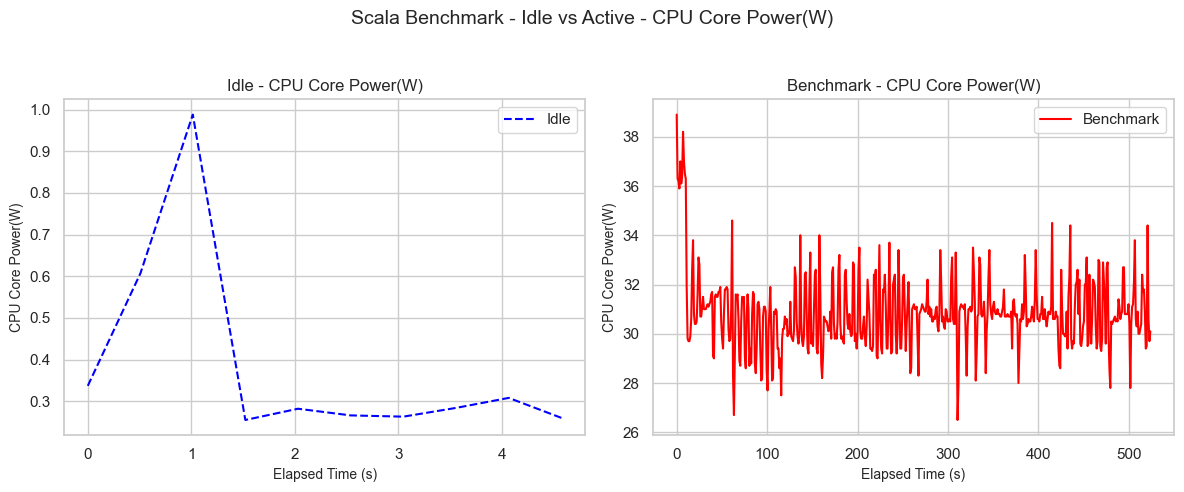

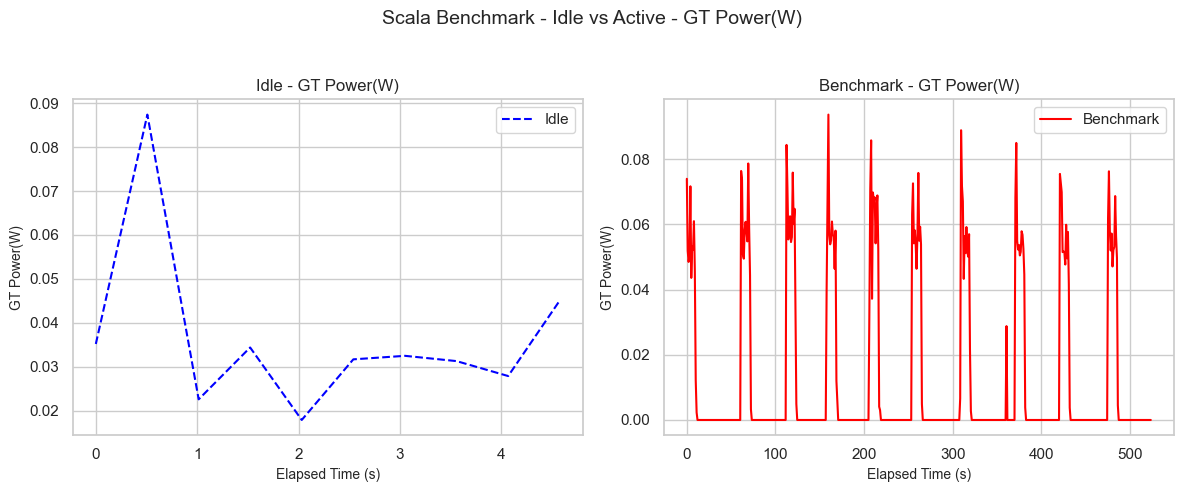

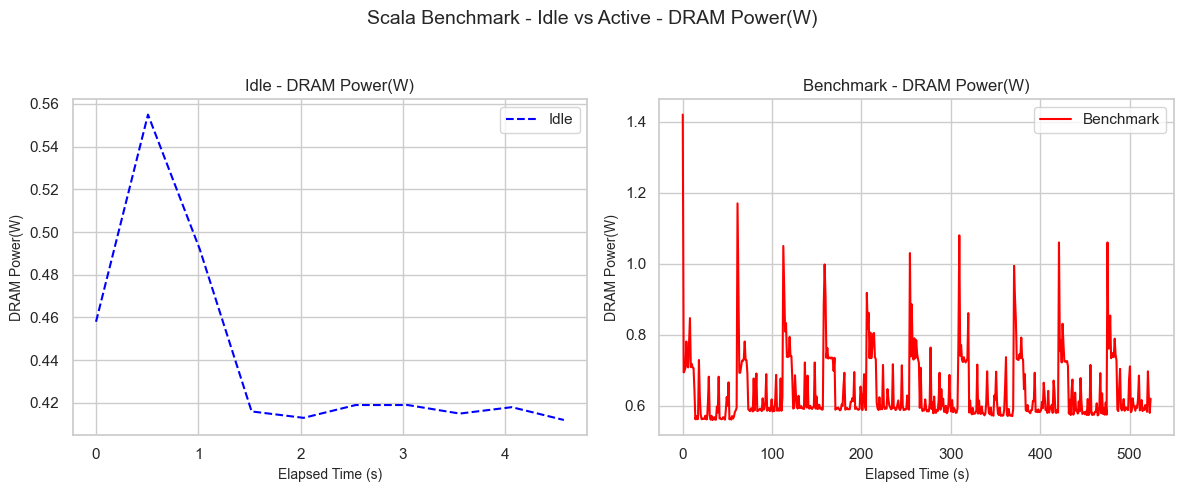

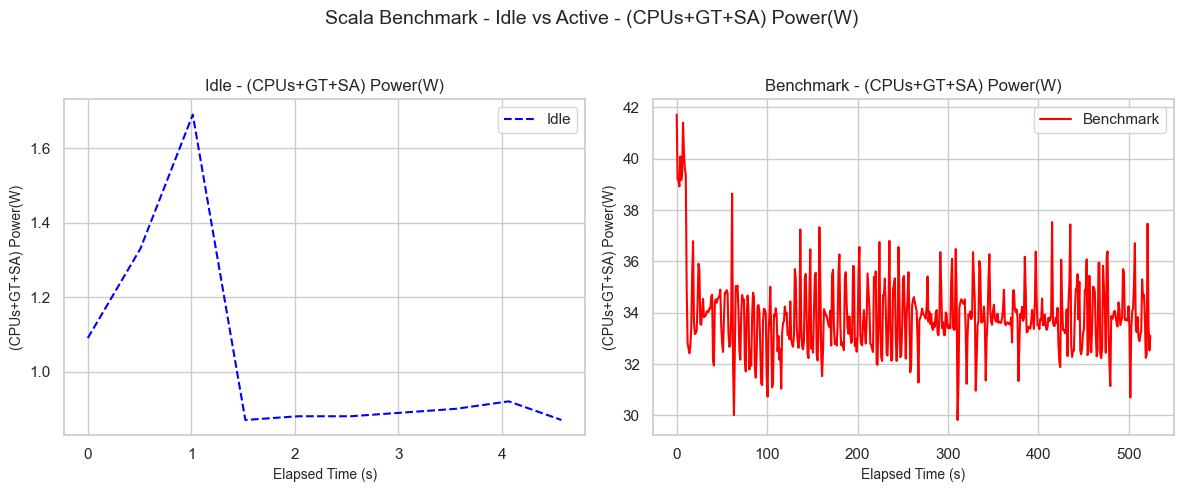

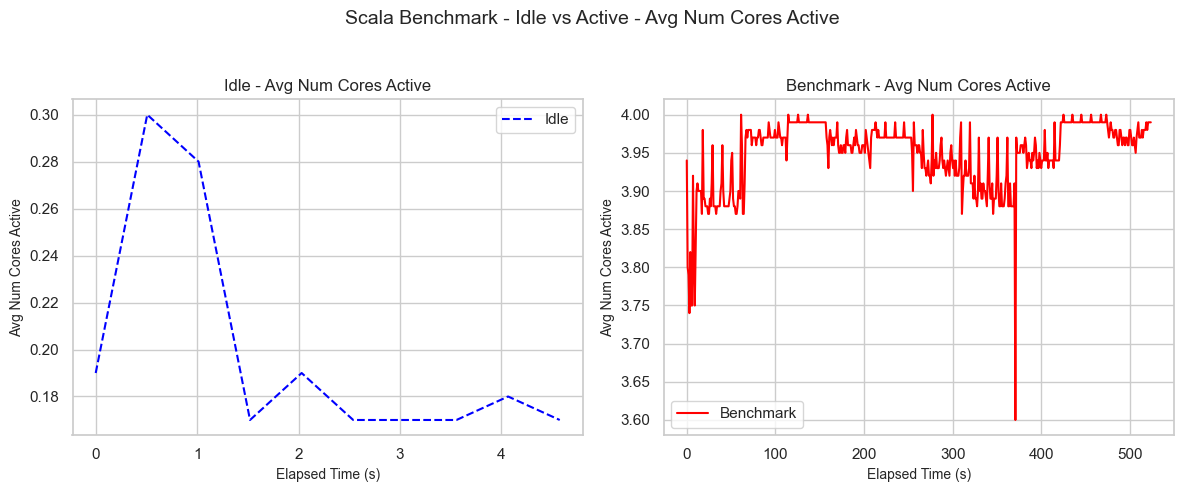

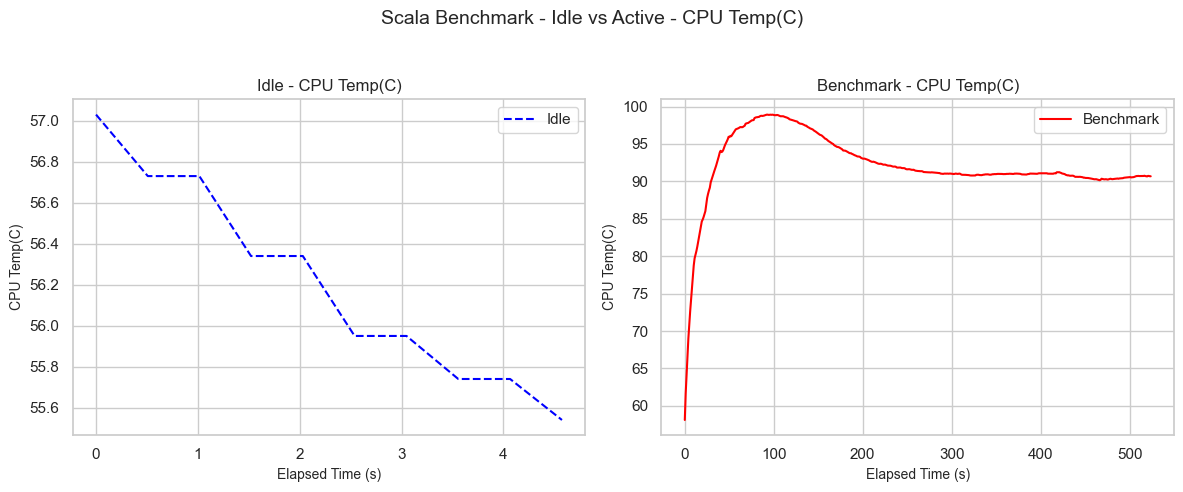

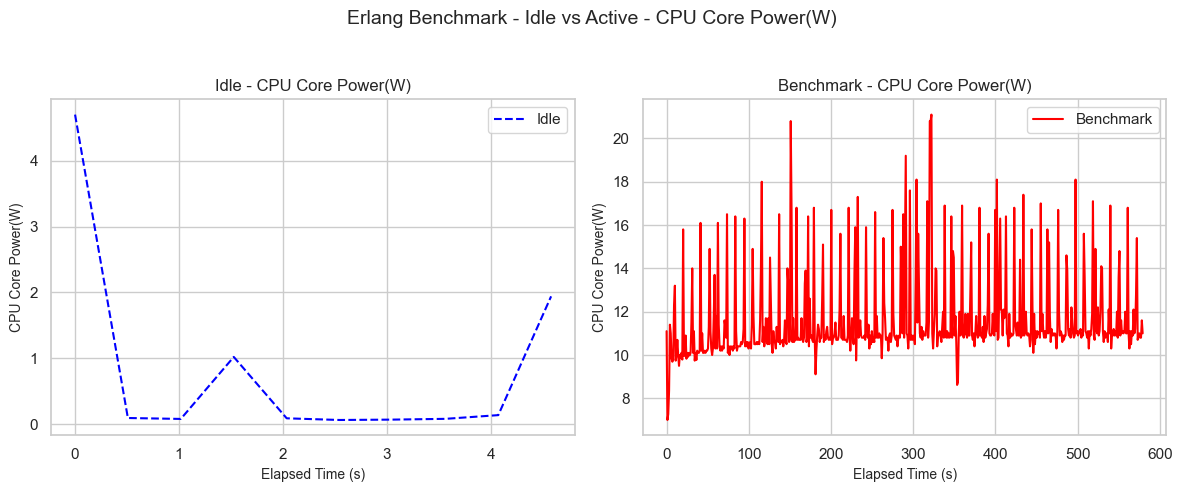

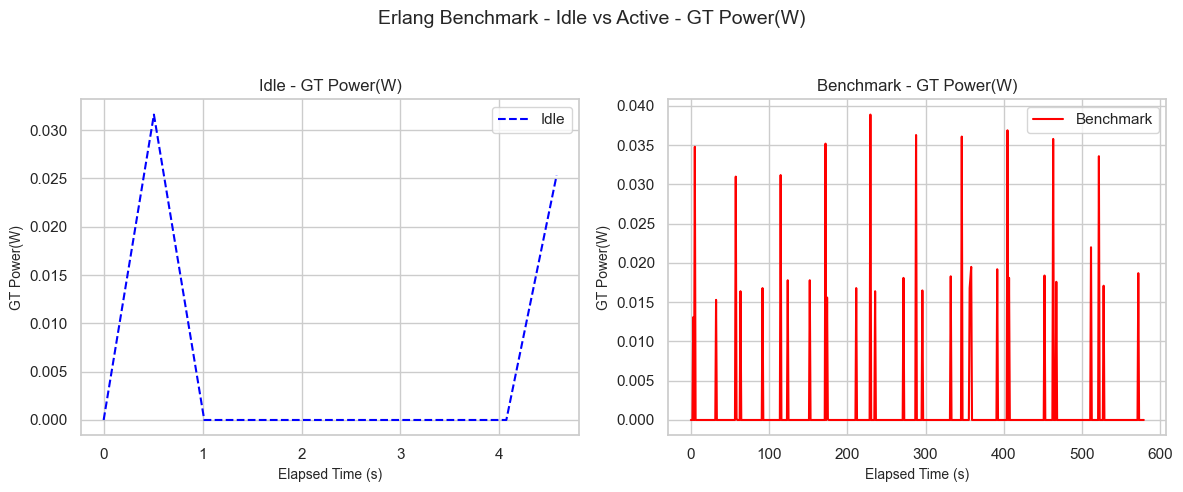

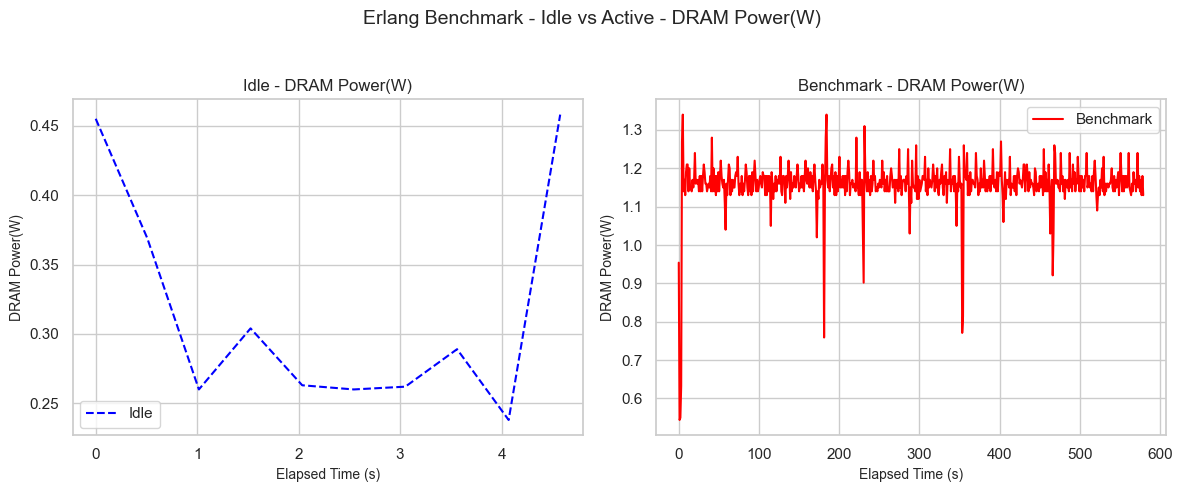

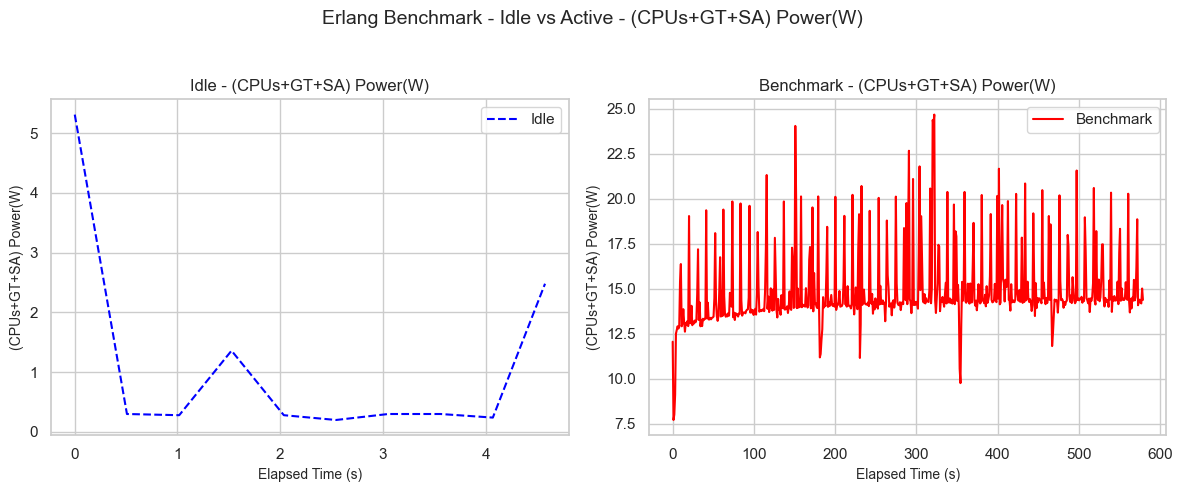

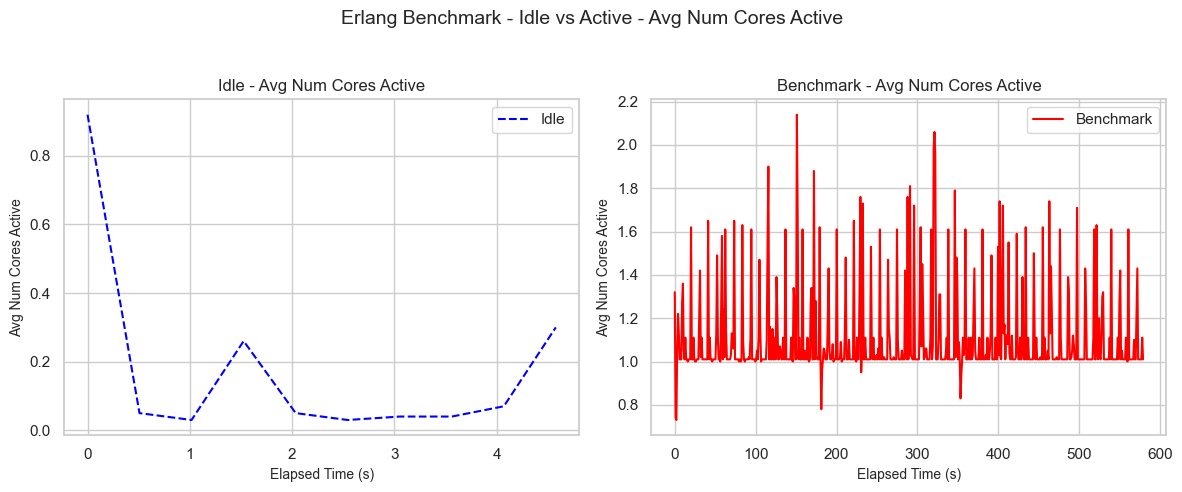

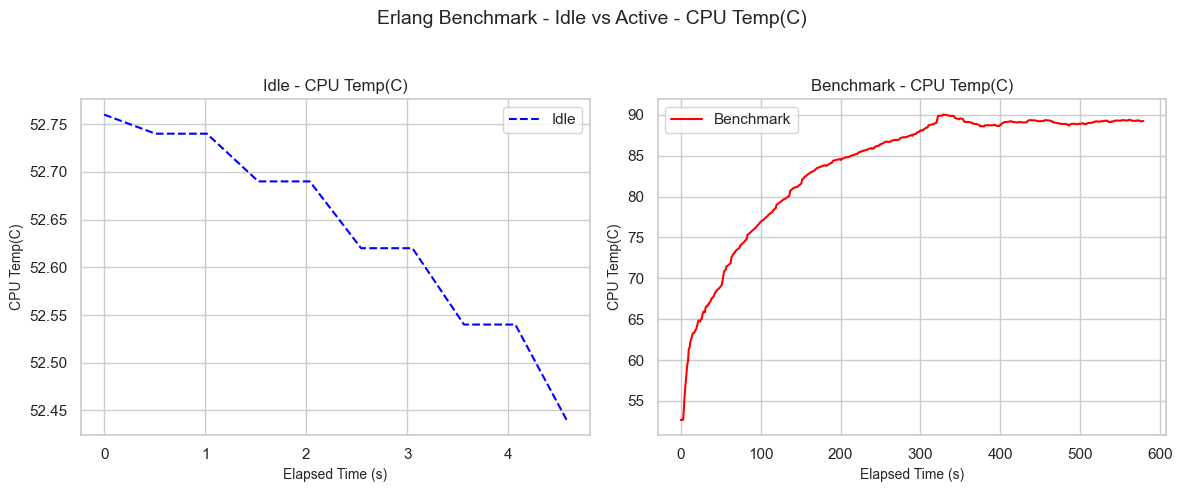

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

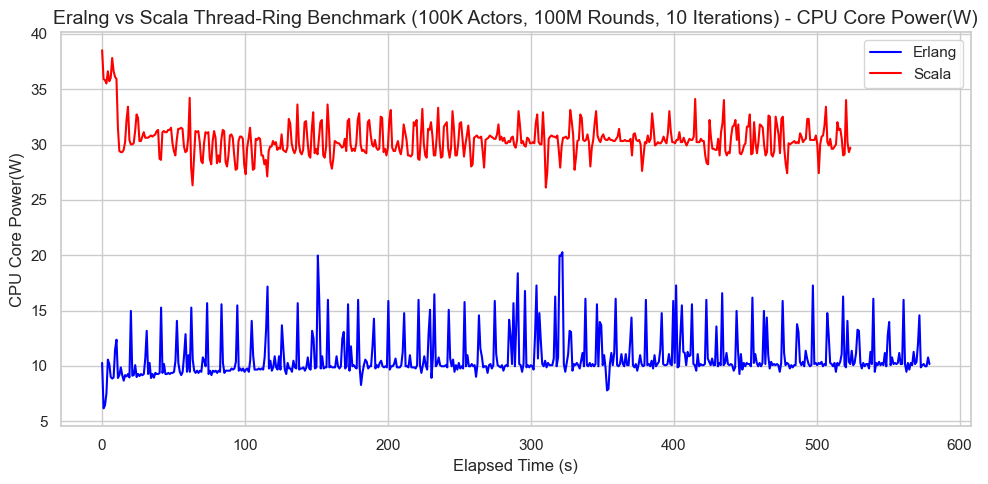

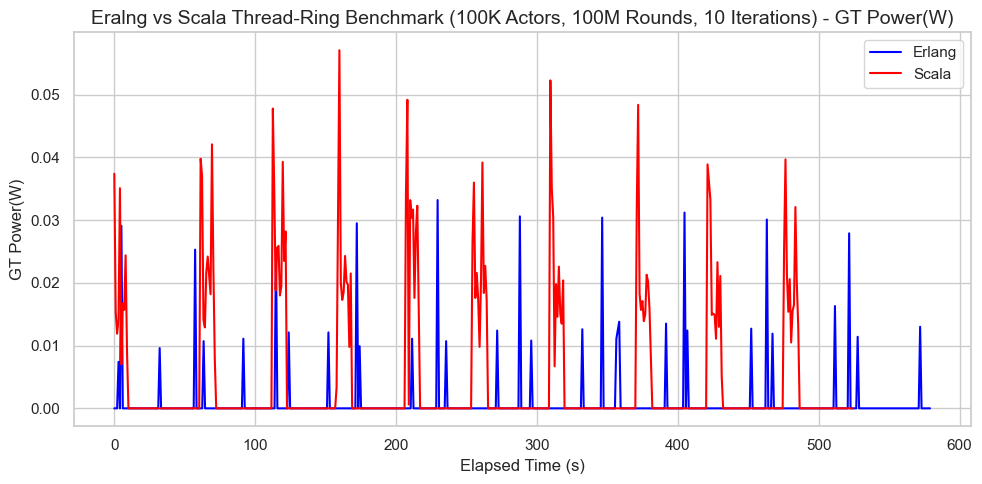

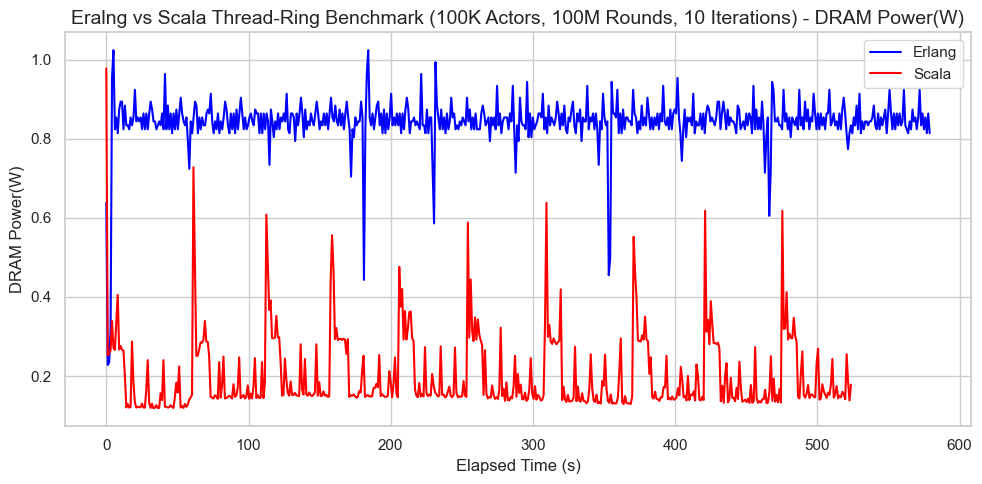

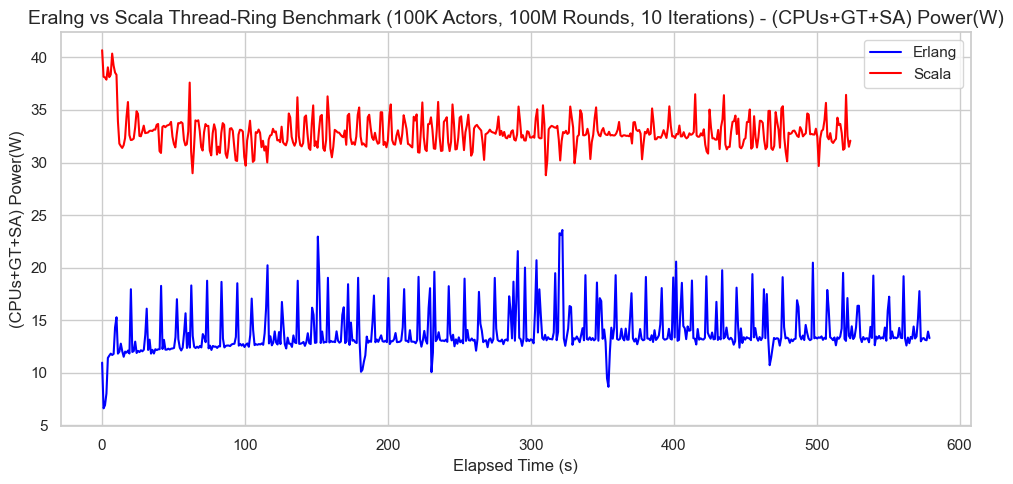

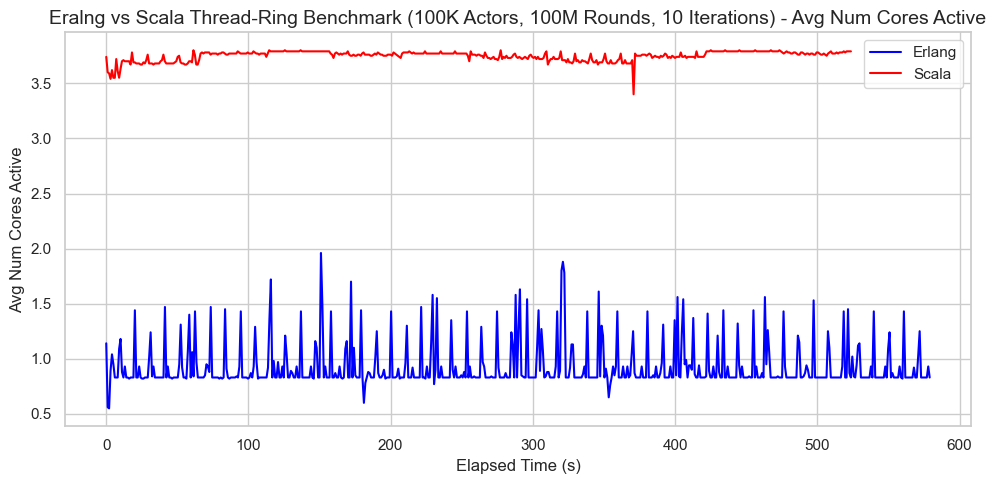

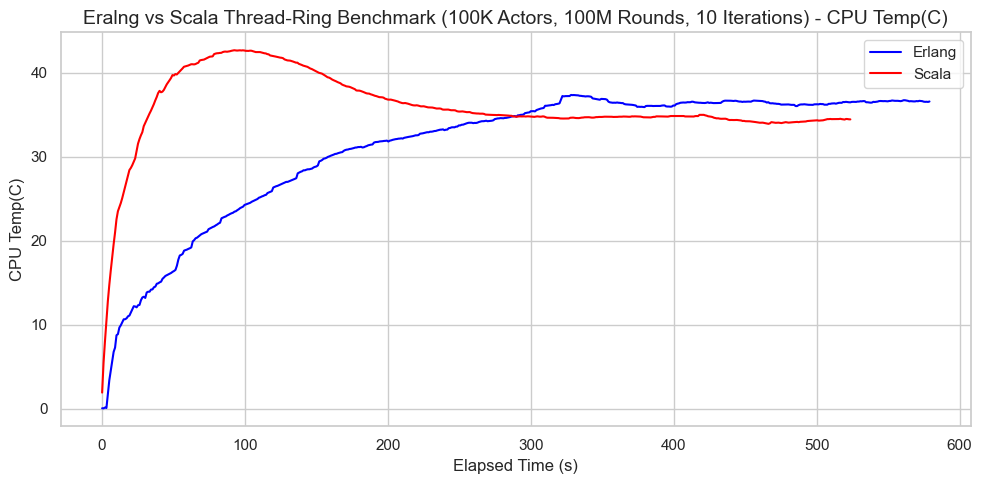

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.471130
GT Power(W)              -0.024192
DRAM Power(W)             0.200995
(CPUs+GT+SA) Power(W)    32.865375
CPU Temp(C)              35.915234
Avg Num Cores Active      3.750004
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        10.777968
GT Power(W)              -0.004415
DRAM Power(W)             0.843485
(CPUs+GT+SA) Power(W)    13.773646
CPU Temp(C)              31.119344
Avg Num Cores Active      0.929681
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/2/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 16091.472509209934 Joules
Erlang Benchmark: 6740.43353714065 Joules
